In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Shortcuts
### Legende:
#### gc = googleCollab
#### jn = jupyter notebooks
> ctrl + m + m = convert to text cell (gc) \
 ctrl + m + y = convert to code cell (gc) \
 m = convert to markdown (text) cell (jn) \
 y = convert to code cell (jn) \

 [Markdown doc](https://rpruim.github.io/s341/S19/from-class/MathinRmd.html)

# Sinuston plotten

In [4]:
#ein numpy array ist eine "liste" die einen datentyp beinhalten kann
groese = 5
array = np.zeros(groese,dtype = float)
print(array)
array = np.zeros(groese,dtype = int)
print(array)

[0. 0. 0. 0. 0.]
[0 0 0 0 0]


In [73]:
#wenn die arrays gleich groß sind kann man diese verrechnen

array = np.zeros(100)
array2 = np.ones(100)
array3 = np.ones(100)
array2 = array2 + array3
array2

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

Für arrays mit verschiedener größe werden diese resized siehe -> [doc](https://www.yaohong.vip/post/python/numpyadd/#2add-a-different-shape-array)

In [29]:
ar_2 = np.ones(1)
ar_3 = np.ones(2)
#wenn man den index angibt wird es nicht resized (angepasst)
#also vorsicht nicht die größe vom array zu überschreiten
# nur : bedeutet vom anfang bis zum ende
# :X und zahl bedeutet bis zu index X
# Y: von index Y
# Y:X von Y zu X
# Y:-1 von Y bis zum ende
ar_2[:] += ar_3[:1]
ar_2 = ar_2 + ar_3

array([3., 3.])

In [18]:

for i in ar_2:
  print(i)

1.0


512
0.0
0.001953125
0.00390625
0.005859375
0.0078125
0.009765625
0.01171875
0.013671875
0.015625
0.017578125
0.01953125
0.021484375
0.0234375
0.025390625
0.02734375
0.029296875
0.03125
0.033203125
0.03515625
0.037109375
0.0390625
0.041015625
0.04296875
0.044921875
0.046875
0.048828125
0.05078125
0.052734375
0.0546875
0.056640625
0.05859375
0.060546875
0.0625
0.064453125
0.06640625
0.068359375
0.0703125
0.072265625
0.07421875
0.076171875
0.078125
0.080078125
0.08203125
0.083984375
0.0859375
0.087890625
0.08984375
0.091796875
0.09375
0.095703125
0.09765625
0.099609375
0.1015625
0.103515625
0.10546875
0.107421875
0.109375
0.111328125
0.11328125
0.115234375
0.1171875
0.119140625
0.12109375
0.123046875
0.125
0.126953125
0.12890625
0.130859375
0.1328125
0.134765625
0.13671875
0.138671875
0.140625
0.142578125
0.14453125
0.146484375
0.1484375
0.150390625
0.15234375
0.154296875
0.15625
0.158203125
0.16015625
0.162109375
0.1640625
0.166015625
0.16796875
0.169921875
0.171875
0.173828125
0.1757812

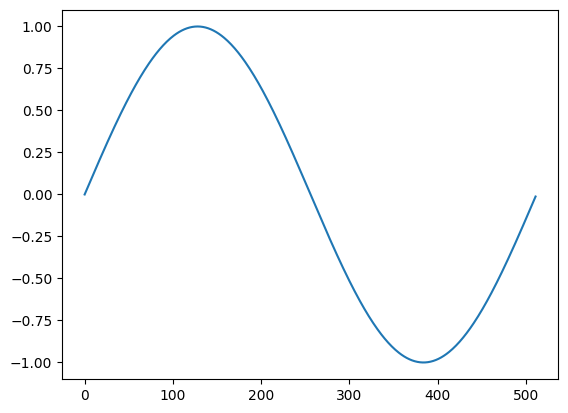

In [5]:
#ein leeres array
sine = np.zeros(512)
print(len(sine))

for i in range(512):
  sine[i] = np.sin(2 * np.pi * float(i)/float(512))
  #geht von 0 bis 1
  print(float(i)/float(512))
  #somit hat man einen zyklus eines sinustones
plt.plot(sine)

512


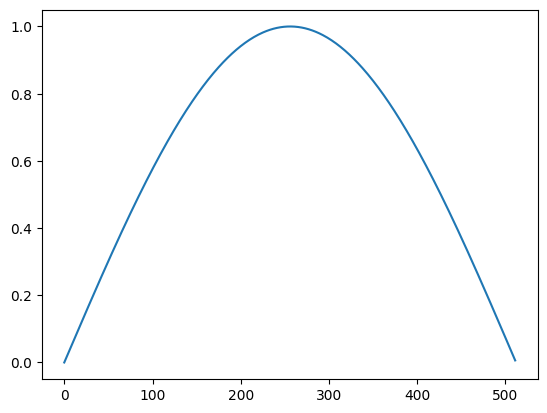

In [38]:
half_sine = np.zeros(512)
print(len(sine))

for i in range(512):
  #multilpiziert man nur mit pi dann hat man nur den positiven anteil ("halber zyklus")
  half_sine[i] = np.sin(np.pi * float(i)/float(512))

plt.plot(half_sine)

# Sinuston erzeugen

In [10]:
freq = 440
sr = 44100
#indices bzw. größen von arrays können nur integers sein
duration = int(1.5 * sr)
sineTone = np.zeros(duration)

for i in range(duration):

  sineTone[i] = np.sin(2.0 * np.pi * float(i) / float(sr) * freq)



In [11]:
display(Audio(sineTone, rate = sr))

### Funktion zur Generierung eines Sinustons für additive Synthese

In [53]:
def sineToneGen(freq,amp,length,freqmult,sr):
  samp_length = int(length * sr)
  arr = np.zeros(samp_length)
  for i in range(samp_length):
    arr[i] = np.sin(2.0 * np.pi * float(i) / float(sr) * freq * freqmult) * amp
  return arr

(0.0, 100.22727272727273)

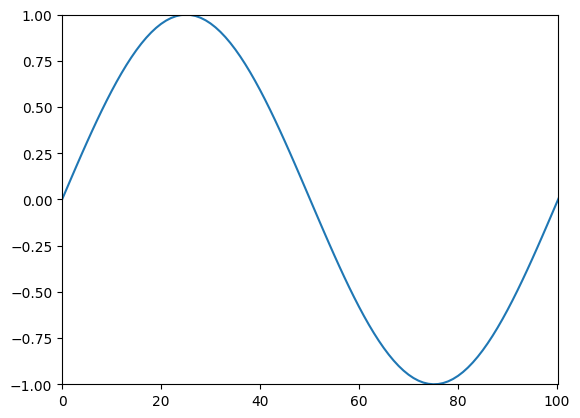

In [59]:
freq = 440
plt.plot(sineToneGen(freq,1,2,1,44100))
plt.ylim(-1,1)
plt.xlim(0,sr /freq)

### Additive Synthese

In [ ]:
dur = 2
freq = 220
sr = 44100
amp = float(1 / 3)
sumarr = np.zeros(dur * sr)
sumarr = sineToneGen(freq,amp,dur,1,sr) +  sineToneGen(freq,amp,dur,2,sr) +  sineToneGen(freq,amp,dur,3,sr)

plt.plot(sumarr)
plt.ylim(-1,1)
plt.xlim(0,sr /freq)
display(Audio(sumarr, rate = sr))


In [57]:
num_overtones = 20
scale = float(1 / num_overtones)
freq = 100
sr = 44100
freq_scale = 1
dur = 2
sums = np.zeros(int(dur*sr))
for i in range(num_overtones):
  sums += sineToneGen(freq,scale,dur,freq_scale,sr)
  freq_scale += 1
display(Audio(sums,rate = sr))


 # Wavetable mit linearer Interpolation
  [click me](https://github.com/micknoise/Maximilian/blob/master/src/maximilian.cpp)


//This is a sinewave oscillator that uses linear interpolation on a x point buffer \
	double remainder; \
	phase += x./(sampleRate/(frequency)); \
	if ( phase >= x - 1 ) phase -=x; \
	remainder = phase - floor(phase); \
	output = (double) ((1-remainder) * sineBuffer[1+ (long) phase] + remainder * sineBuffer[2+(long) phase]); \
	return(output); \
}

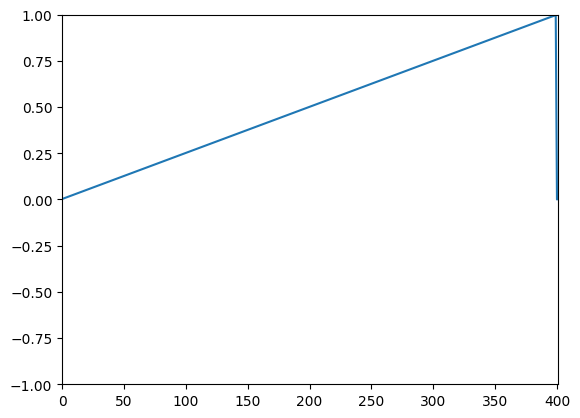

In [72]:
size = 4096
phas = np.zeros(size)
for i in range(size):
  phas[i]= float(i) /float(size)
  #np.random.rand
phase = 0
freq = 110
dur = 44100
remainder = 0
out = np.zeros(dur)
for i in range(dur):
  phase += float(size) / (float(sr) / float(freq))
  if phase >= size - 1:
    phase -= size
  remainder = phase - np.floor(phase)
  out[i] = (1.0 - remainder) * phas[int(phase)] + remainder * phas[1 + int(phase)]


plt.plot(out)
plt.xlim(0,sr/freq)
plt.ylim(-1,1)
display(Audio(out,rate=sr))
